In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#### utils

In [5]:
class PatchEmbed(nn.Module):
    def __init__(self, kernel_size, stride, padding, in_chans, embed_dim):
        super().__init__()
        self.proj = nn.Conv2d(
            in_chans, embed_dim, kernel_size=kernel_size, stride=stride,
            padding=padding
        )
    
    def foward(self, x):
        x = self.proj(x)
        # b,c,h,w -> b,h,w,c
        x = x.permute(0, 2, 3, 1)
        return x

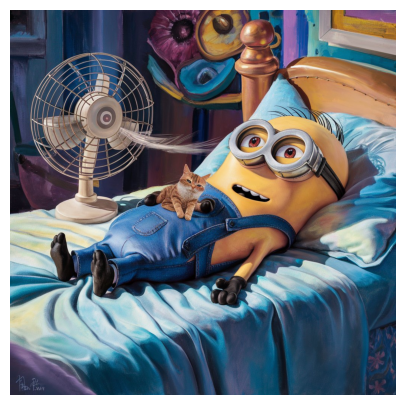

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.figsize'] = [10, 5]

test_image = Image.open('./minion_img.jpeg')
test_image = np.array(test_image)
plt.imshow(test_image)
plt.axis('off')
plt.show()

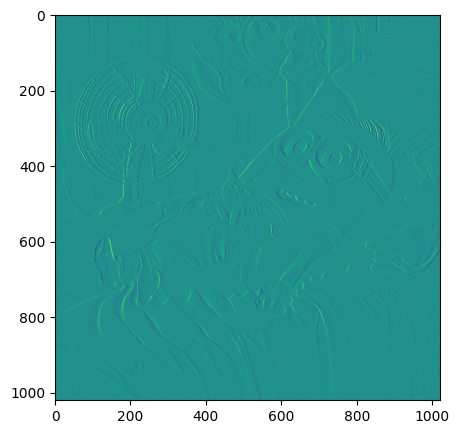

In [45]:
# warmup conv2d (@fastai)
test_image = Image.open('./minion_img.jpeg')
test_image = np.array(test_image)
test_image = torch.from_numpy(test_image)

top_edge_kernel = torch.tensor([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
    ]).float()


def apply_kernel(row, col, kernel, img):
    return (img[row-1:row+2, col-1:col+2] * kernel).sum()

rng = range(1, test_image.shape[0]-2)
after_conv_img = torch.tensor([[apply_kernel(i, j, top_edge_kernel, test_image) for j in rng] for i in rng])
plt.axis('off')
plt.imshow(after_conv_img)
plt.show()


In [3]:
class ImageEncoder(nn.Module):
    def __init__(self, trunk, neck, scalp=0):
        super().__init__()
        self.trunk = trunk
        self.neck = neck
        self.scalp = scalp
    
    def forward(self, sample):
        features, pos = self.neck(self.trunk(sample))
        
